In [2]:
#downloading the dataset
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot

#load the image into memory
(trainX,trainY),(testX,testY)=load_data()

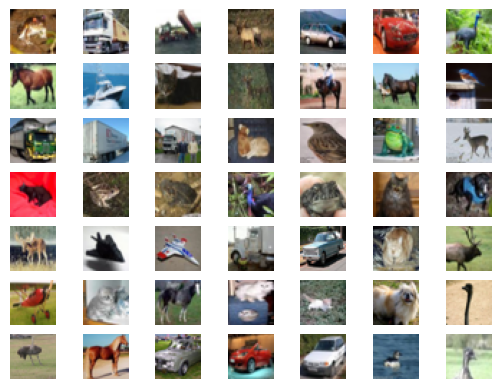

In [3]:
# ploting images the training the dataset
for i in range(49):
    pyplot.subplot(7,7,1+i)
    pyplot.axis('off')
    pyplot.imshow(trainX[i])
pyplot.show()

In [4]:
print(trainX.shape)

(50000, 32, 32, 3)


In [5]:
#example of defining the discrimintor model
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense,Conv2D,Flatten,Dropout,LeakyReLU
from tensorflow.keras.utils import plot_model
import numpy as np

In [6]:
# define the standalone discriminator model
def define_discrimintor(in_shape=(32,32,3)):
    model=Sequential()
    model.add(Conv2D(64,(3,3),padding='same',input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    
    #downsample the image 
    model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    #downsample the image
    model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    #downsample the image 
    model.add(Conv2D(256,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    #classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation='sigmoid'))

    #compile model
    opt=Adam(learning_rate=0.0002,beta_1=0.5)
    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
    return model


/Users/dipenpatel/Desktop/Learning/LLM/myenv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/dipenpatel/Desktop/Learning/LLM/myenv/lib/python3.9/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 522,497 (1.99 MB)

 Trainable params: 522,497 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

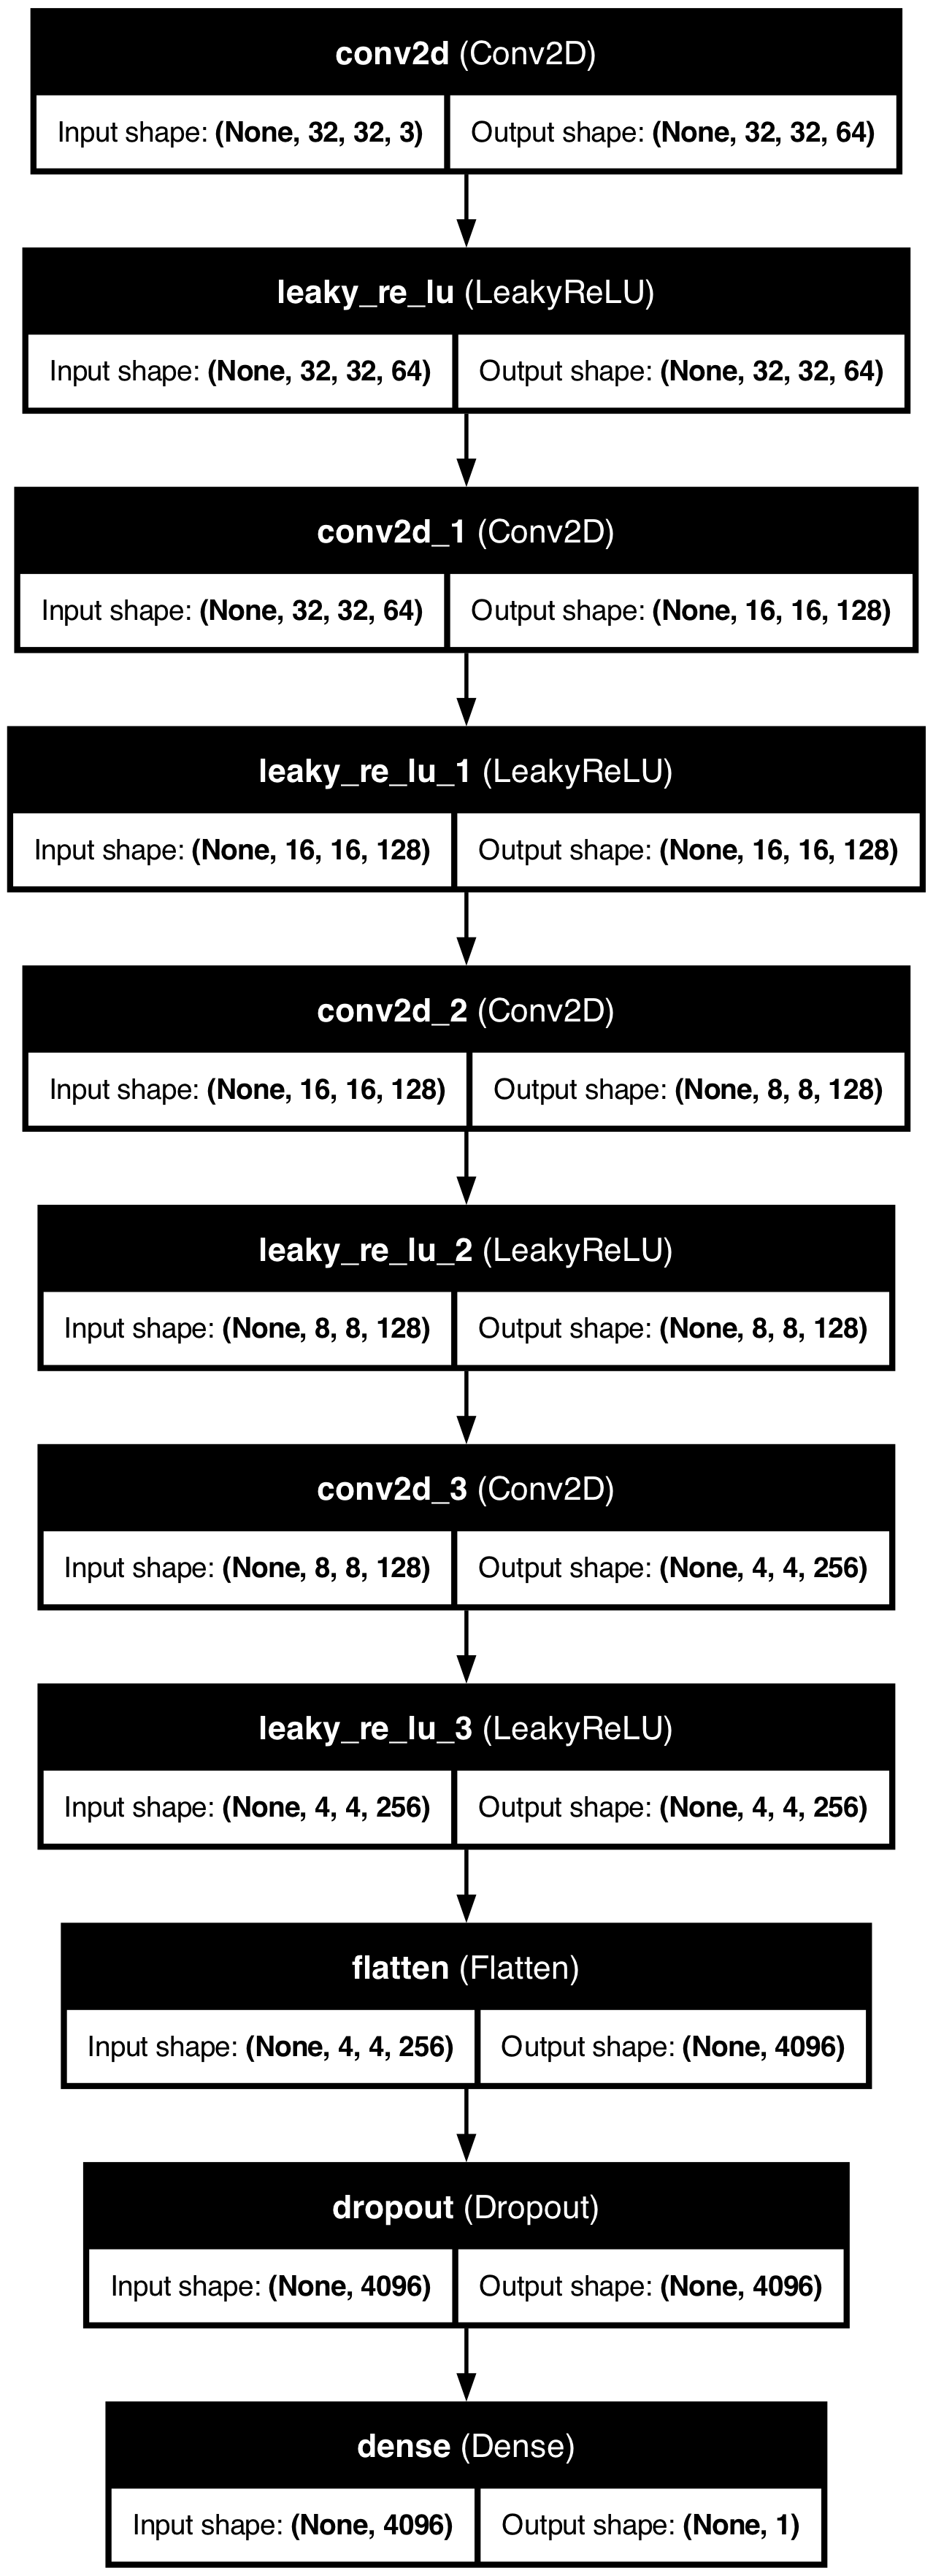

In [7]:
#define model 

model=define_discrimintor()
model.summary()
plot_model(model,to_file='discriminator.png',show_shapes=True,show_layer_names=True)

In [8]:
# function to load the dataset and scale it 
# load and prepare cifar10 training image 
def load_real_sample():
    (trainX,_),(_,_)=load_data()
    x=trainX.astype('float32')
    x=(x-127.5)/127.5
    return x

In [9]:
X=load_real_sample()
X.shape

(50000, 32, 32, 3)

In [10]:
X[0]

array([[[-0.5372549 , -0.5137255 , -0.5058824 ],
        [-0.6627451 , -0.6392157 , -0.64705884],
        [-0.60784316, -0.62352943, -0.6627451 ],
        ...,
        [ 0.23921569,  0.03529412, -0.15294118],
        [ 0.19215687, -0.01960784, -0.2       ],
        [ 0.16078432, -0.02745098, -0.19215687]],

       [[-0.8745098 , -0.84313726, -0.84313726],
        [-1.        , -1.        , -1.        ],
        [-0.85882354, -0.9372549 , -1.        ],
        ...,
        [-0.03529412, -0.30980393, -0.5686275 ],
        [-0.06666667, -0.34901962, -0.60784316],
        [-0.04313726, -0.31764707, -0.5529412 ]],

       [[-0.8039216 , -0.8117647 , -0.8352941 ],
        [-0.8745098 , -0.94509804, -1.        ],
        [-0.6156863 , -0.7882353 , -0.9372549 ],
        ...,
        [-0.07450981, -0.34117648, -0.60784316],
        [-0.05882353, -0.34117648, -0.60784316],
        [-0.14509805, -0.42745098, -0.67058825]],

       ...,

       [[ 0.6313726 ,  0.33333334, -0.24705882],
        [ 0

In [11]:
# select real samples
def generate_real_sample(dataset,n_samples):
    #choose random instance
    ix=np.random.randint(0,dataset.shape[0],n_samples)
    
    #retrieve selected images
    x=dataset[ix]

    #generate 'real' class labels(1)
    y=np.ones((n_samples,1))
    return x,y

In [12]:
x,y=generate_real_sample(X,64)
print(x.shape)
print(y.shape)
print(y)

(64, 32, 32, 3)
(64, 1)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [13]:
#generate n fake sample with class labels
def generate_fake_samples(n_samples):
    # generate uniform random message in [0,1]
    X=np.random.rand(32*32*3*n_samples)
    
    #update to have the rang [-1,1]
    X=-1+X*2

    #reshape into a batch of color images 
    X=X.reshape((n_samples,32,32,3))

    #generate 'fake' class labels (0)
    y=np.zeros((n_samples,1))
    return X,y

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9996574583158402..0.9981222361779662].


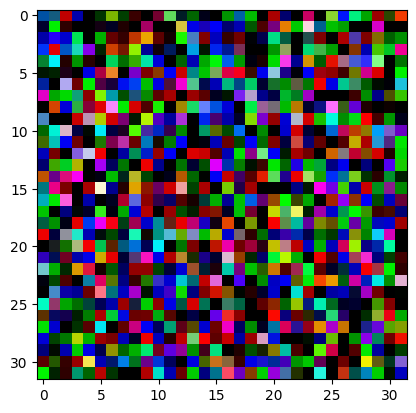

In [14]:
X,y=generate_fake_samples(64)
pyplot.imshow(X[0])

In [15]:
# train the discrimintor model temporaily
def train_discriminator(model,dataset,n_iter=20,n_batch=128):
    half_batch=int(n_batch/2)

    #manually enumerate epochs
    for i in range(n_iter):
        #get randomly selected 'real' samples
        X_real,y_real=generate_real_sample(dataset,half_batch)
        #update discrimintor on real samples
        _,real_acc=model.train_on_batch(X_real,y_real)
        #generate 'fake' examples
        x_fake,y_fake=generate_fake_samples(half_batch)
        #update discrimintor on fake samples
        _,fake_acc=model.train_on_batch(x_fake,y_fake)
        print('>%d real=%.0f%% fake=%.0f%%'%(i+1,real_acc*100,fake_acc*100))

In [17]:
#Example Training 
#define discrimination model
model=define_discrimintor()
#load large data
dataset=load_real_sample()
train_discriminator(model,dataset)

>1 real=36% fake=21%
>2 real=42% fake=37%
>3 real=47% fake=48%
>4 real=52% fake=56%
>5 real=60% fake=63%
>6 real=66% fake=69%
>7 real=71% fake=73%
>8 real=74% fake=75%
>9 real=76% fake=78%
>10 real=79% fake=80%
>11 real=80% fake=81%
>12 real=82% fake=83%
>13 real=83% fake=84%
>14 real=84% fake=85%
>15 real=85% fake=86%
>16 real=86% fake=86%
>17 real=87% fake=87%
>18 real=88% fake=88%
>19 real=88% fake=88%
>20 real=89% fake=89%
